In [1]:
!nvidia-smi


Wed Nov 12 22:48:05 2025       
+---------------------------------------------------------------------------------------+
| NVIDIA-SMI 530.30.02              Driver Version: 530.30.02    CUDA Version: 12.1     |
|-----------------------------------------+----------------------+----------------------+
| GPU  Name                  Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf            Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                                         |                      |               MIG M. |
|=========================================+======================+======================|
|   0  NVIDIA GeForce RTX 2080 Ti      Off| 00000000:1A:00.0 Off |                  N/A |
| 16%   26C    P8                1W / 250W|     18MiB / 11264MiB |      0%      Default |
|                                         |                      |                  N/A |
+-----------------------------------------+----------------------+--

In [2]:
#hack till I make it a real package..
import os
import sys
sys.path.append("../../")
#using GPU, comment out if on CPU?
os.environ['CUDA_DEVICE_ORDER'] = 'PCI_BUS_ID'
os.environ['CUDA_VISIBLE_DEVICES'] = '2,3'
import jax 
import jax.numpy as jnp

jax.config.update('jax_disable_jit', False)
jax.config.update('jax_debug_nans', True)

import diffhydro as dh
from diffhydro.utils.io import athinput,athdf
%pylab inline


%pylab is deprecated, use %matplotlib inline and import the required libraries.
Populating the interactive namespace from numpy and matplotlib


In [3]:
import diffhydro as dh


eq = dh.equationmanager.EquationManager()
eq.mesh_shape=[400,400,400]

In [4]:
U = dh.turbulence.init_turbulent_velocity(eq, 100, 1.0, 1.0,kmax=10,seed=123)

%pylab is deprecated, use %matplotlib inline and import the required libraries.
Populating the interactive namespace from numpy and matplotlib


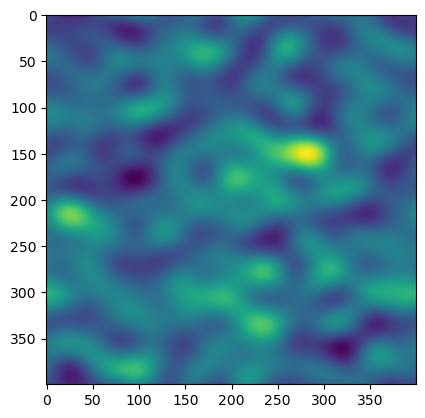

In [5]:
%pylab inline
imshow(U[3][30])

In [6]:
eq.cfl = 0.3
ss = dh.signal_speed_Rusanov

solver = dh.LaxFriedrichs(equation_manager=eq,signal_speed=ss)
grav = dh.physics.gravity.FFTSelfGravityForce(eq, G=6E-4, subtract_mean=True)  

cf = dh.ConvectiveFlux(eq,solver,dh.MUSCL3(limiter="VANLEER"),positivity=False)
#ct = dh.mhd.ConstrainedTransportFlux(eq, solver, dh.MUSCL3(limiter="MINMOD"), positivity=False)

hydro = dh.hydro(n_super_step=2000, fluxes=[cf],forces=[grav],
                 use_mol=True, integrator="RK2",
                 snapshot_every=50,snapshot_dir="turb_collapse_big2",pmesh_shape=(2,1,1)) 
                 
                 

In [7]:
import copy
params = {}
output = hydro.evolve_with_callbacks(copy.deepcopy(U),params)

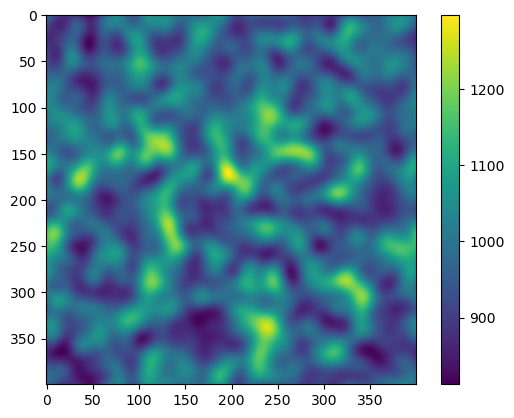

In [8]:
imshow(U[-1].sum(axis=0))
colorbar()

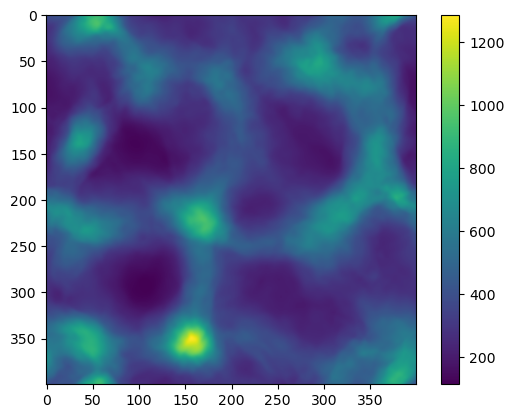

In [9]:
imshow(output[0][0].sum(axis=0))
colorbar()

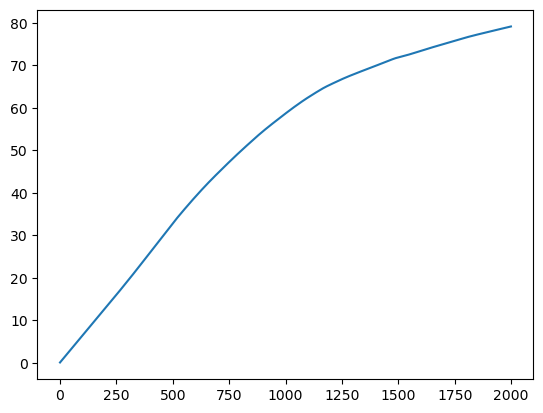

In [49]:
plt.plot(np.cumsum(output[-1]))

Shard shape: (5, 200, 400, 400)
Partition spec: PartitionSpec(None, 'x', 'y', 'z')
Axis mapping: {'x': 1, 'y': 2, 'z': 3}


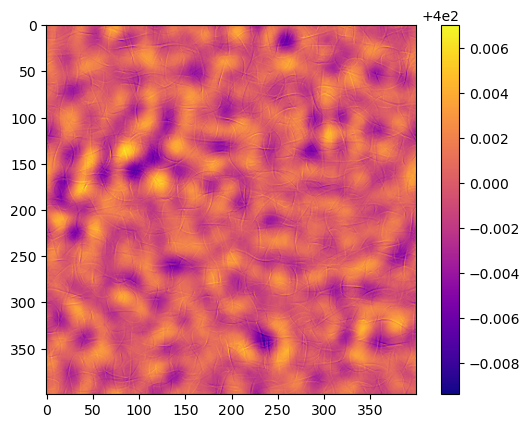

Shard shape: (5, 200, 400, 400)
Partition spec: PartitionSpec(None, 'x', 'y', 'z')
Axis mapping: {'x': 1, 'y': 2, 'z': 3}


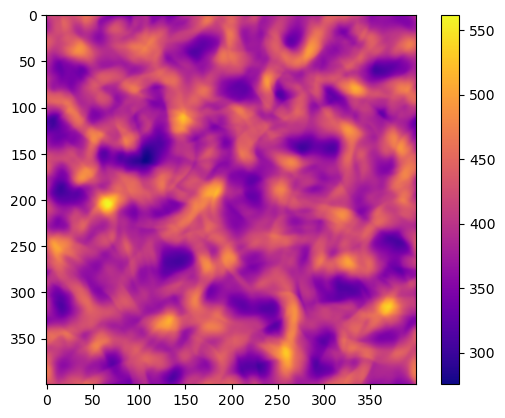

Shard shape: (5, 200, 400, 400)
Partition spec: PartitionSpec(None, 'x', 'y', 'z')
Axis mapping: {'x': 1, 'y': 2, 'z': 3}


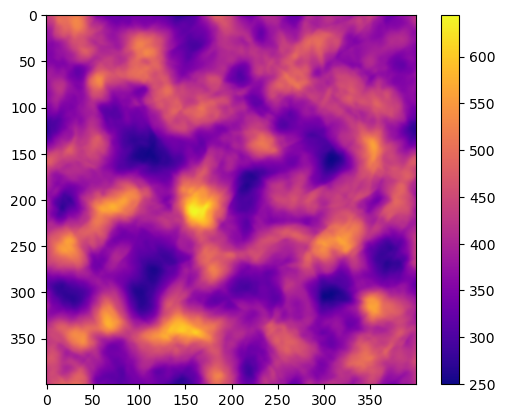

Shard shape: (5, 200, 400, 400)
Partition spec: PartitionSpec(None, 'x', 'y', 'z')
Axis mapping: {'x': 1, 'y': 2, 'z': 3}


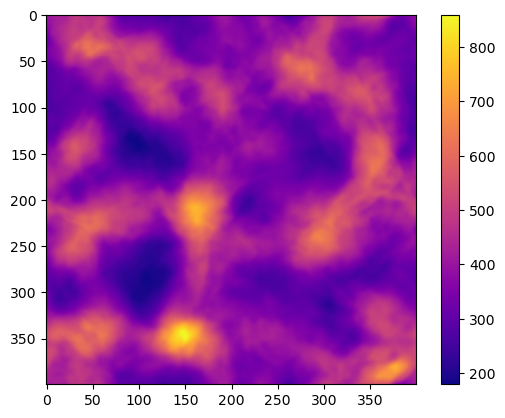

Shard shape: (5, 200, 400, 400)
Partition spec: PartitionSpec(None, 'x', 'y', 'z')
Axis mapping: {'x': 1, 'y': 2, 'z': 3}


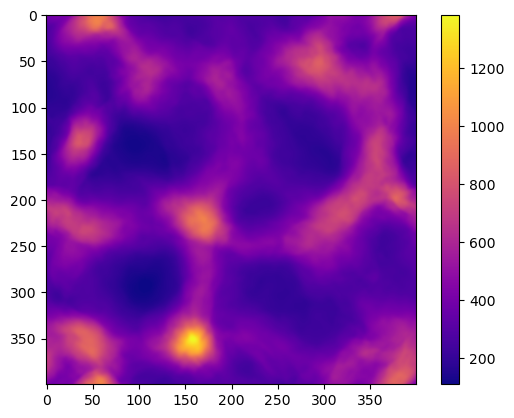

Shard shape: (5, 200, 400, 400)
Partition spec: PartitionSpec(None, 'x', 'y', 'z')
Axis mapping: {'x': 1, 'y': 2, 'z': 3}


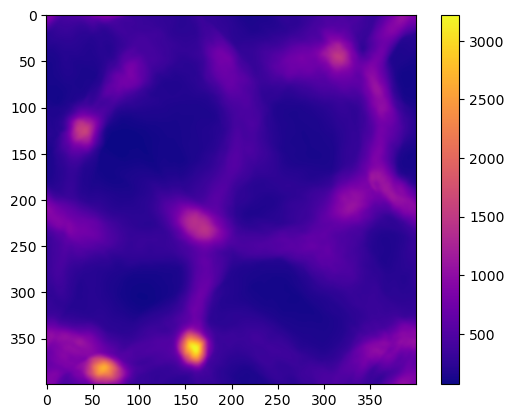

Shard shape: (5, 200, 400, 400)
Partition spec: PartitionSpec(None, 'x', 'y', 'z')
Axis mapping: {'x': 1, 'y': 2, 'z': 3}


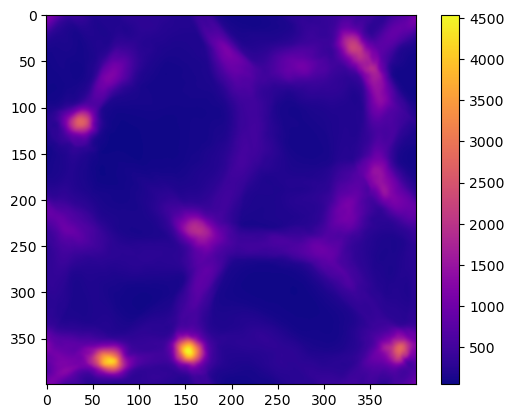

Shard shape: (5, 200, 400, 400)
Partition spec: PartitionSpec(None, 'x', 'y', 'z')
Axis mapping: {'x': 1, 'y': 2, 'z': 3}


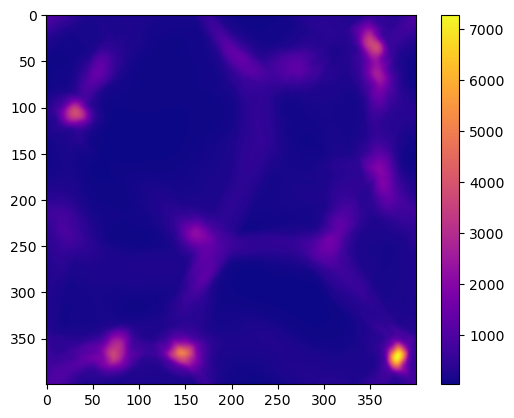

Shard shape: (5, 200, 400, 400)
Partition spec: PartitionSpec(None, 'x', 'y', 'z')
Axis mapping: {'x': 1, 'y': 2, 'z': 3}


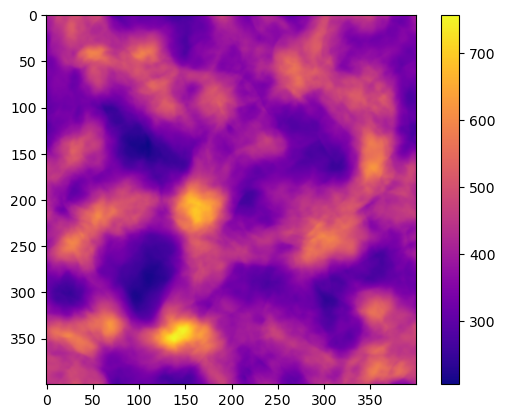

Shard shape: (5, 200, 400, 400)
Partition spec: PartitionSpec(None, 'x', 'y', 'z')
Axis mapping: {'x': 1, 'y': 2, 'z': 3}


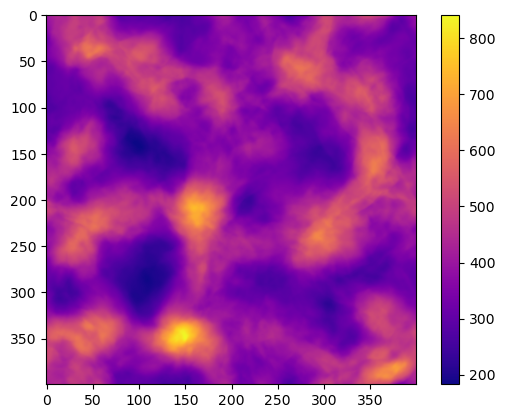

Shard shape: (5, 200, 400, 400)
Partition spec: PartitionSpec(None, 'x', 'y', 'z')
Axis mapping: {'x': 1, 'y': 2, 'z': 3}


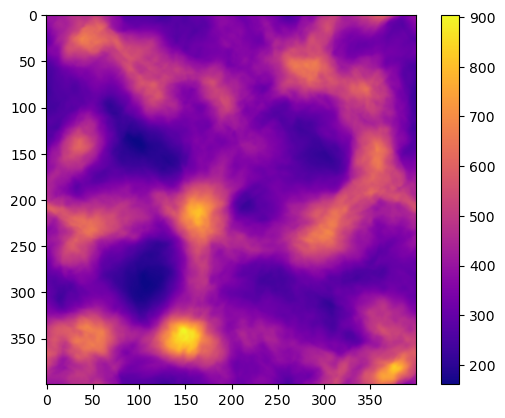

Shard shape: (5, 200, 400, 400)
Partition spec: PartitionSpec(None, 'x', 'y', 'z')
Axis mapping: {'x': 1, 'y': 2, 'z': 3}


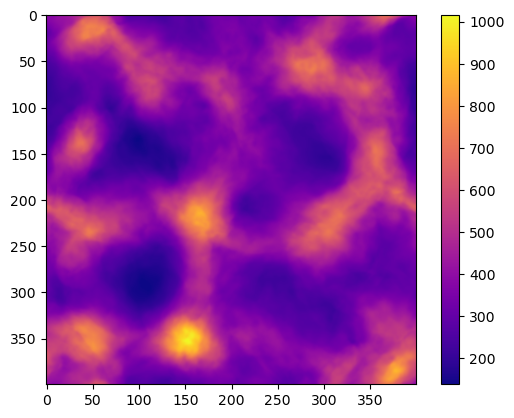

Shard shape: (5, 200, 400, 400)
Partition spec: PartitionSpec(None, 'x', 'y', 'z')
Axis mapping: {'x': 1, 'y': 2, 'z': 3}


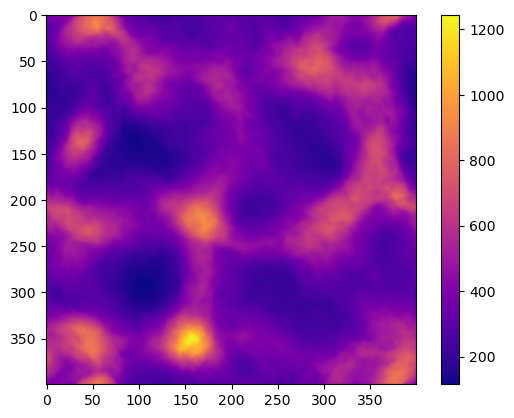

Shard shape: (5, 200, 400, 400)
Partition spec: PartitionSpec(None, 'x', 'y', 'z')
Axis mapping: {'x': 1, 'y': 2, 'z': 3}


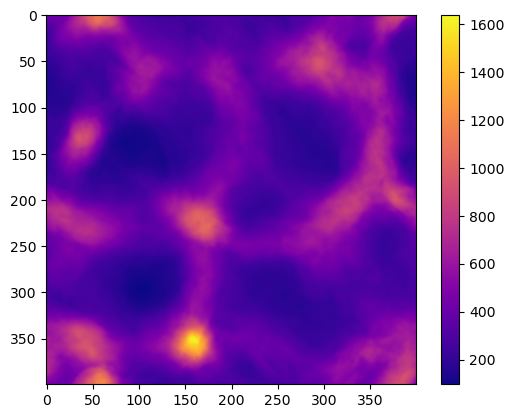

Shard shape: (5, 200, 400, 400)
Partition spec: PartitionSpec(None, 'x', 'y', 'z')
Axis mapping: {'x': 1, 'y': 2, 'z': 3}


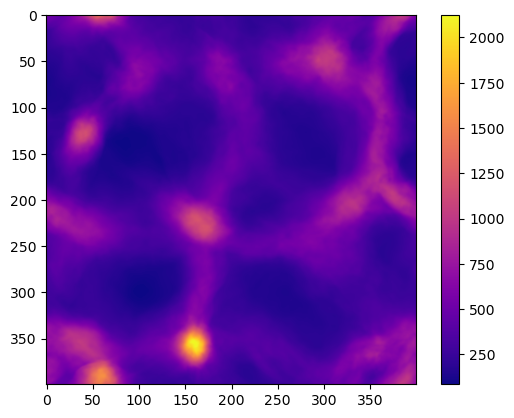

Shard shape: (5, 200, 400, 400)
Partition spec: PartitionSpec(None, 'x', 'y', 'z')
Axis mapping: {'x': 1, 'y': 2, 'z': 3}


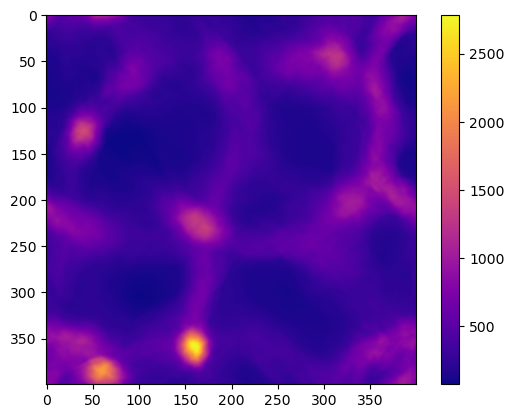

Shard shape: (5, 200, 400, 400)
Partition spec: PartitionSpec(None, 'x', 'y', 'z')
Axis mapping: {'x': 1, 'y': 2, 'z': 3}


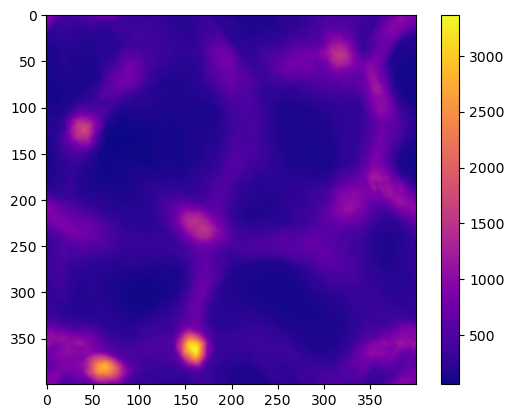

Shard shape: (5, 200, 400, 400)
Partition spec: PartitionSpec(None, 'x', 'y', 'z')
Axis mapping: {'x': 1, 'y': 2, 'z': 3}


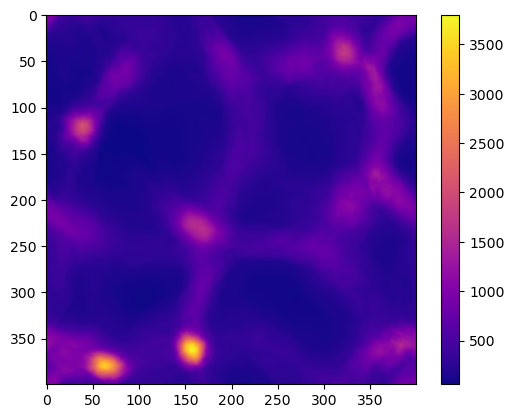

Shard shape: (5, 200, 400, 400)
Partition spec: PartitionSpec(None, 'x', 'y', 'z')
Axis mapping: {'x': 1, 'y': 2, 'z': 3}


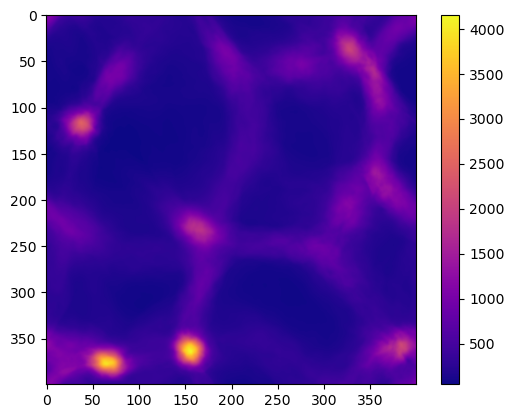

Shard shape: (5, 200, 400, 400)
Partition spec: PartitionSpec(None, 'x', 'y', 'z')
Axis mapping: {'x': 1, 'y': 2, 'z': 3}


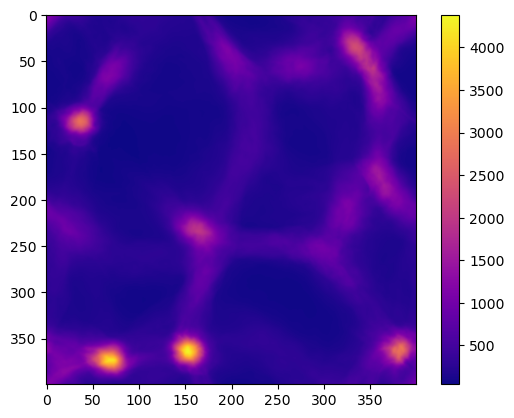

In [50]:
from diffhydro.utils.io import shard_snaps

for i in range(0,5000,250):
    imshow(shard_snaps.load_snapshot(hydro,i)[0].sum(axis=0),cmap="plasma")
    colorbar()
    show()

Shard shape: (5, 200, 400, 400)
Partition spec: PartitionSpec(None, 'x', 'y', 'z')
Axis mapping: {'x': 1, 'y': 2, 'z': 3}


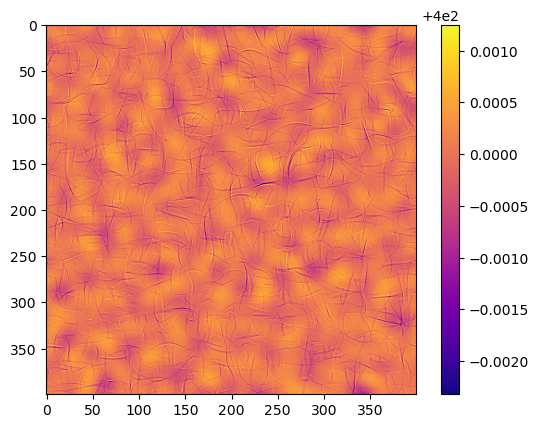

Shard shape: (5, 200, 400, 400)
Partition spec: PartitionSpec(None, 'x', 'y', 'z')
Axis mapping: {'x': 1, 'y': 2, 'z': 3}


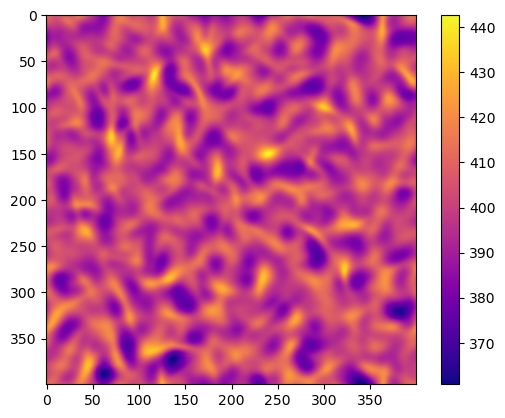

Shard shape: (5, 200, 400, 400)
Partition spec: PartitionSpec(None, 'x', 'y', 'z')
Axis mapping: {'x': 1, 'y': 2, 'z': 3}


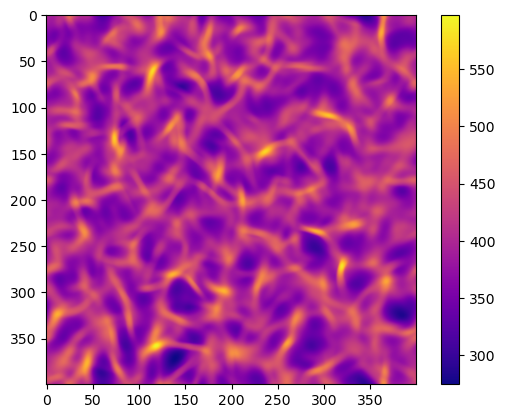

Shard shape: (5, 200, 400, 400)
Partition spec: PartitionSpec(None, 'x', 'y', 'z')
Axis mapping: {'x': 1, 'y': 2, 'z': 3}


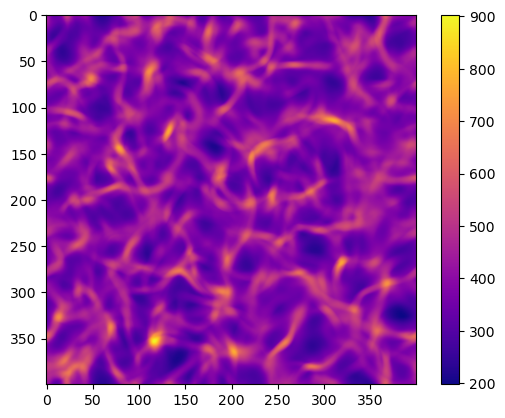

Shard shape: (5, 200, 400, 400)
Partition spec: PartitionSpec(None, 'x', 'y', 'z')
Axis mapping: {'x': 1, 'y': 2, 'z': 3}


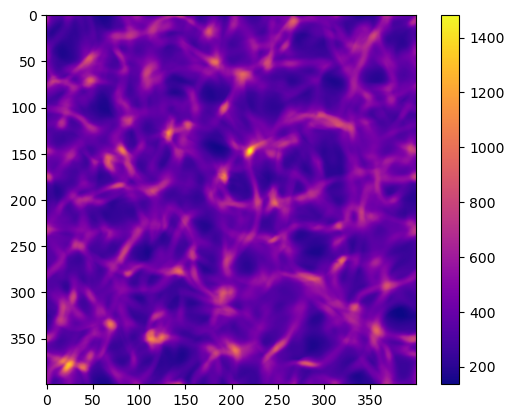

Shard shape: (5, 200, 400, 400)
Partition spec: PartitionSpec(None, 'x', 'y', 'z')
Axis mapping: {'x': 1, 'y': 2, 'z': 3}


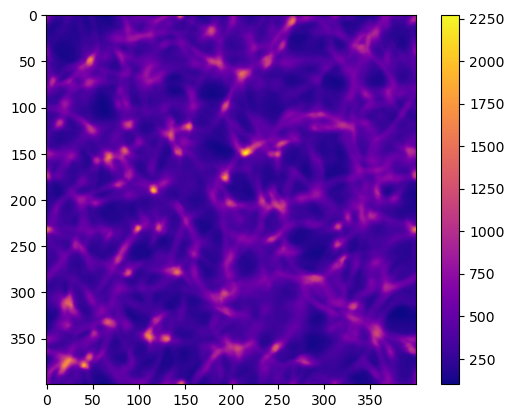

Shard shape: (5, 200, 400, 400)
Partition spec: PartitionSpec(None, 'x', 'y', 'z')
Axis mapping: {'x': 1, 'y': 2, 'z': 3}


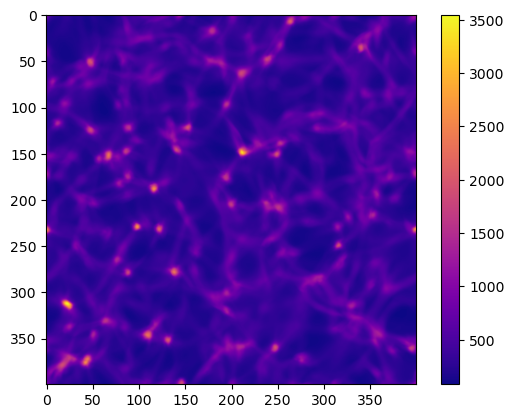

Shard shape: (5, 200, 400, 400)
Partition spec: PartitionSpec(None, 'x', 'y', 'z')
Axis mapping: {'x': 1, 'y': 2, 'z': 3}


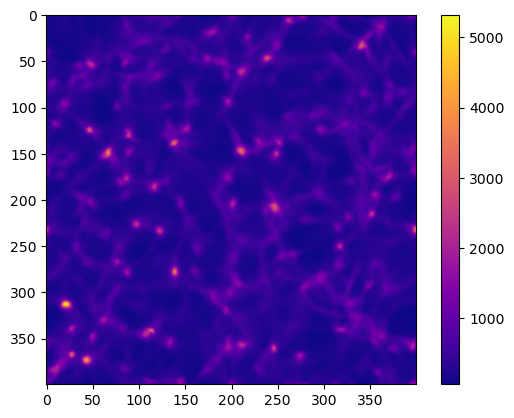

Shard shape: (5, 200, 400, 400)
Partition spec: PartitionSpec(None, 'x', 'y', 'z')
Axis mapping: {'x': 1, 'y': 2, 'z': 3}


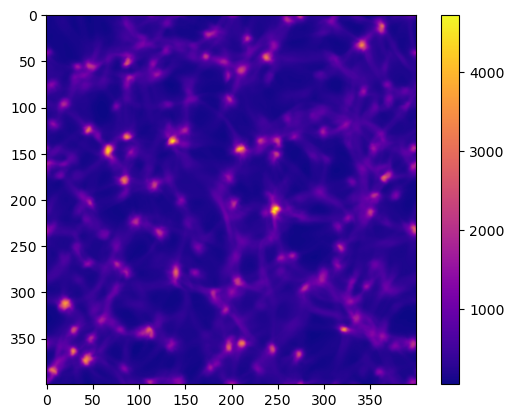

Shard shape: (5, 200, 400, 400)
Partition spec: PartitionSpec(None, 'x', 'y', 'z')
Axis mapping: {'x': 1, 'y': 2, 'z': 3}


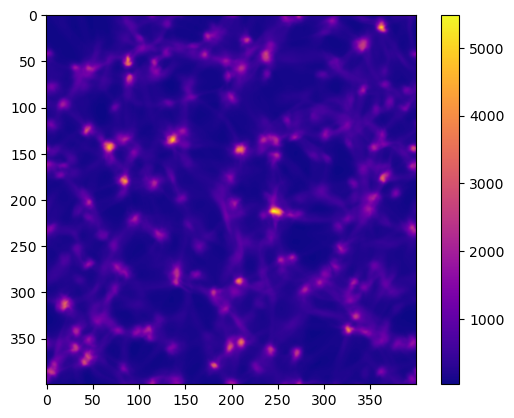

Shard shape: (5, 200, 400, 400)
Partition spec: PartitionSpec(None, 'x', 'y', 'z')
Axis mapping: {'x': 1, 'y': 2, 'z': 3}


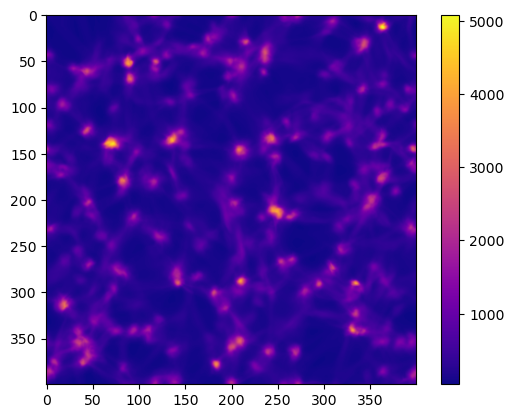

Shard shape: (5, 200, 400, 400)
Partition spec: PartitionSpec(None, 'x', 'y', 'z')
Axis mapping: {'x': 1, 'y': 2, 'z': 3}


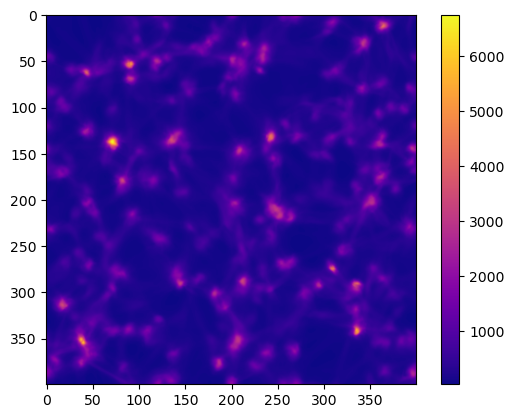

Shard shape: (5, 200, 400, 400)
Partition spec: PartitionSpec(None, 'x', 'y', 'z')
Axis mapping: {'x': 1, 'y': 2, 'z': 3}


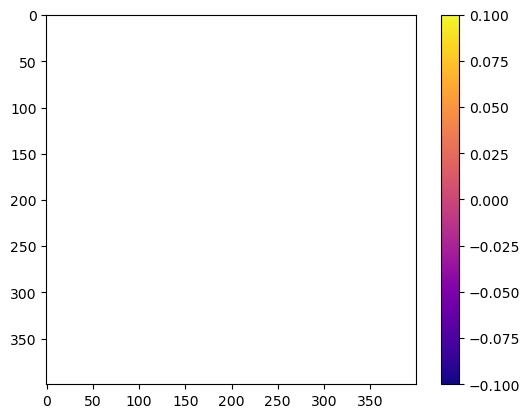

Shard shape: (5, 200, 400, 400)
Partition spec: PartitionSpec(None, 'x', 'y', 'z')
Axis mapping: {'x': 1, 'y': 2, 'z': 3}


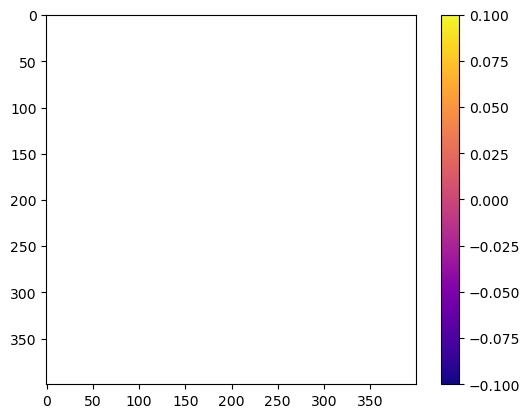

Shard shape: (5, 200, 400, 400)
Partition spec: PartitionSpec(None, 'x', 'y', 'z')
Axis mapping: {'x': 1, 'y': 2, 'z': 3}


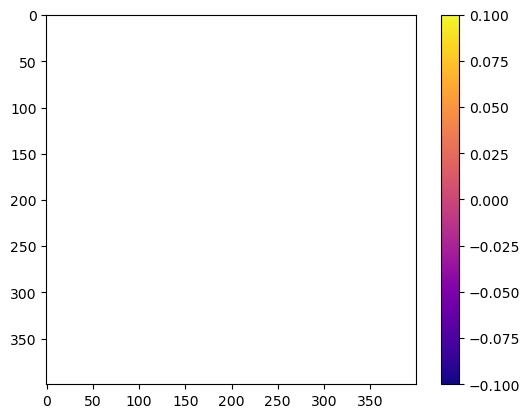

Shard shape: (5, 200, 400, 400)
Partition spec: PartitionSpec(None, 'x', 'y', 'z')
Axis mapping: {'x': 1, 'y': 2, 'z': 3}


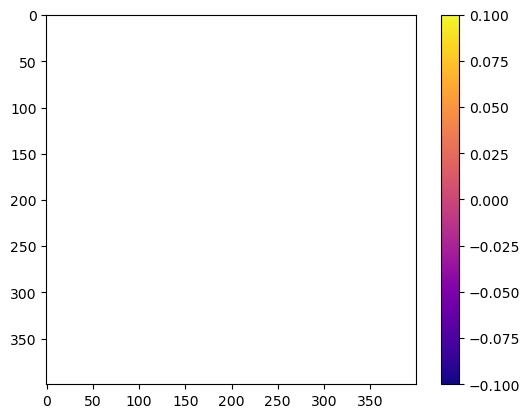

Shard shape: (5, 200, 400, 400)
Partition spec: PartitionSpec(None, 'x', 'y', 'z')
Axis mapping: {'x': 1, 'y': 2, 'z': 3}


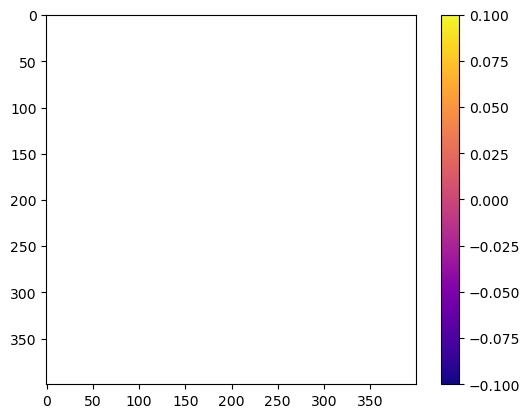

Shard shape: (5, 200, 400, 400)
Partition spec: PartitionSpec(None, 'x', 'y', 'z')
Axis mapping: {'x': 1, 'y': 2, 'z': 3}


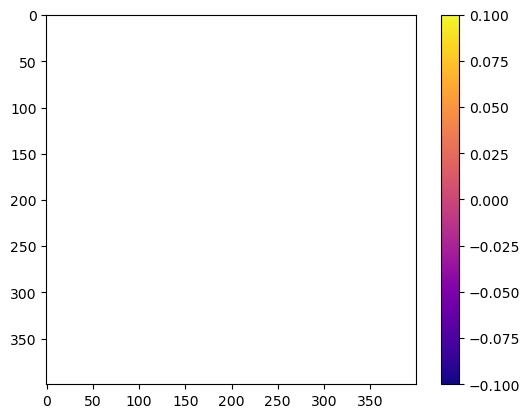

Shard shape: (5, 200, 400, 400)
Partition spec: PartitionSpec(None, 'x', 'y', 'z')
Axis mapping: {'x': 1, 'y': 2, 'z': 3}


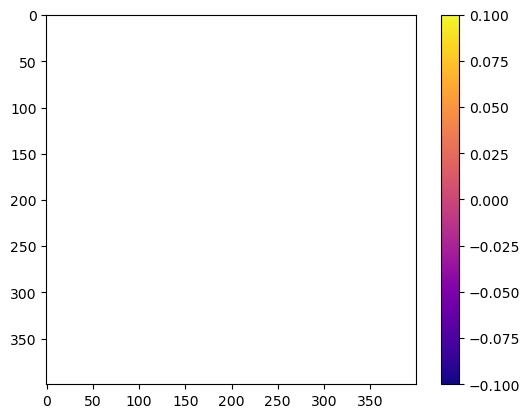

Shard shape: (5, 200, 400, 400)
Partition spec: PartitionSpec(None, 'x', 'y', 'z')
Axis mapping: {'x': 1, 'y': 2, 'z': 3}


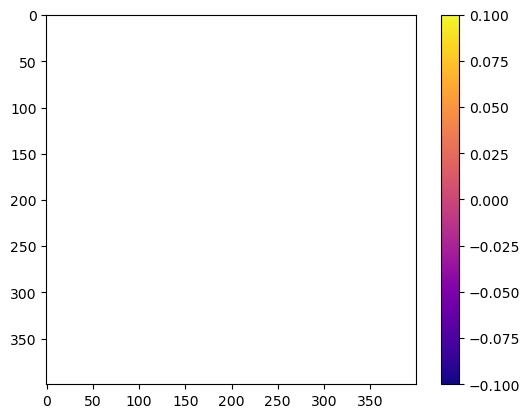

In [11]:
from diffhydro.utils.io import shard_snaps

for i in range(0,5000,250):
    imshow(shard_snaps.load_snapshot(hydro,i)[0].sum(axis=2),cmap="plasma")
    colorbar()
    show()

Shard shape: (5, 100, 100, 100)
Partition spec: PartitionSpec(None, 'x', 'y', 'z')
Axis mapping: {'x': 1, 'y': 2, 'z': 3}


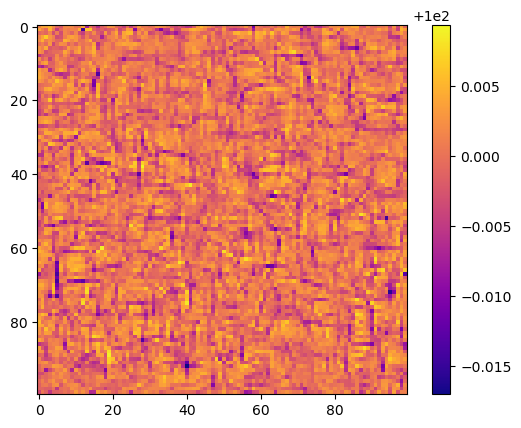

Shard shape: (5, 100, 100, 100)
Partition spec: PartitionSpec(None, 'x', 'y', 'z')
Axis mapping: {'x': 1, 'y': 2, 'z': 3}


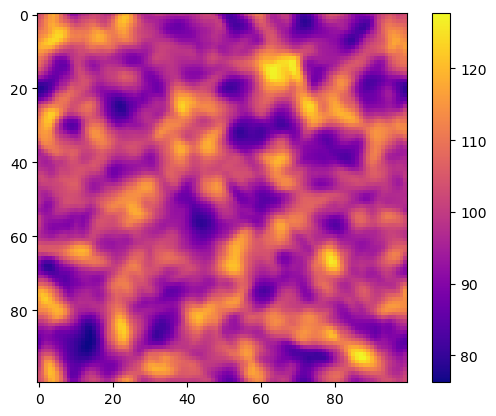

Shard shape: (5, 100, 100, 100)
Partition spec: PartitionSpec(None, 'x', 'y', 'z')
Axis mapping: {'x': 1, 'y': 2, 'z': 3}


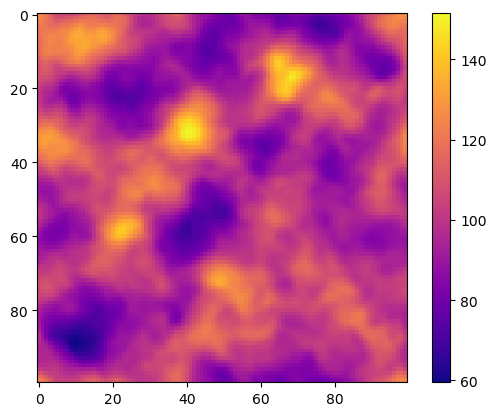

Shard shape: (5, 100, 100, 100)
Partition spec: PartitionSpec(None, 'x', 'y', 'z')
Axis mapping: {'x': 1, 'y': 2, 'z': 3}


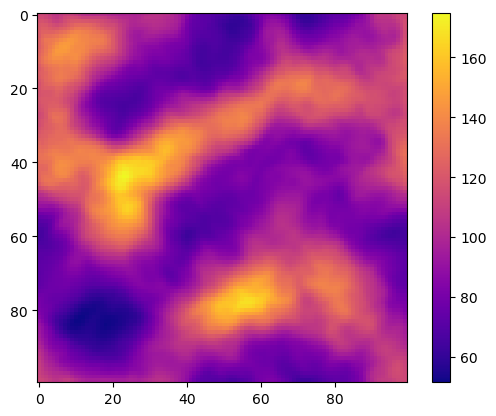

Shard shape: (5, 100, 100, 100)
Partition spec: PartitionSpec(None, 'x', 'y', 'z')
Axis mapping: {'x': 1, 'y': 2, 'z': 3}


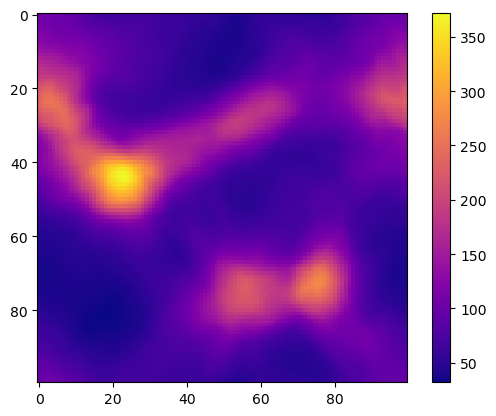

Shard shape: (5, 100, 100, 100)
Partition spec: PartitionSpec(None, 'x', 'y', 'z')
Axis mapping: {'x': 1, 'y': 2, 'z': 3}


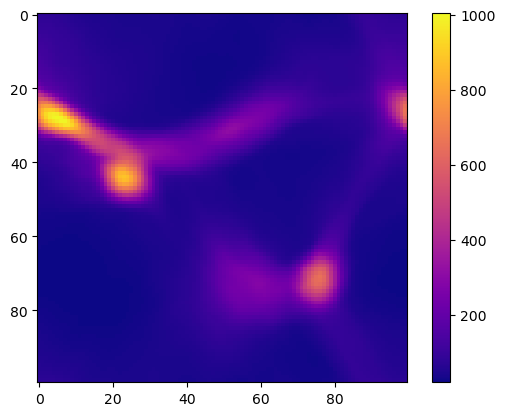

Shard shape: (5, 100, 100, 100)
Partition spec: PartitionSpec(None, 'x', 'y', 'z')
Axis mapping: {'x': 1, 'y': 2, 'z': 3}


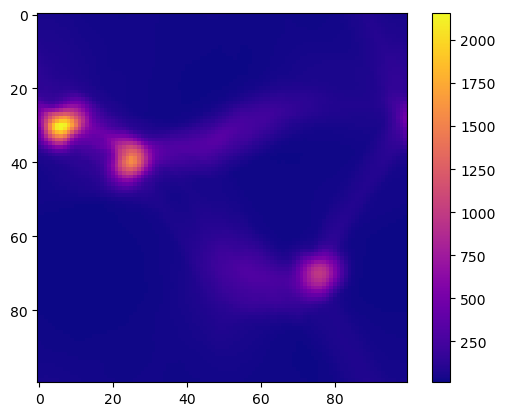

Shard shape: (5, 100, 100, 100)
Partition spec: PartitionSpec(None, 'x', 'y', 'z')
Axis mapping: {'x': 1, 'y': 2, 'z': 3}


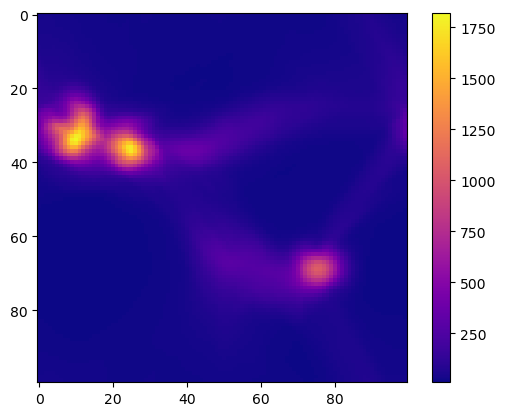

Shard shape: (5, 100, 100, 100)
Partition spec: PartitionSpec(None, 'x', 'y', 'z')
Axis mapping: {'x': 1, 'y': 2, 'z': 3}


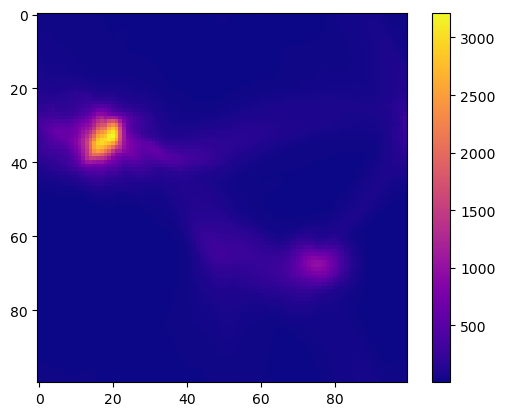

Shard shape: (5, 100, 100, 100)
Partition spec: PartitionSpec(None, 'x', 'y', 'z')
Axis mapping: {'x': 1, 'y': 2, 'z': 3}


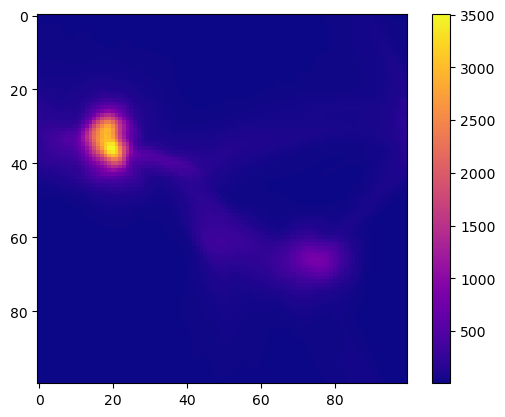

Shard shape: (5, 100, 100, 100)
Partition spec: PartitionSpec(None, 'x', 'y', 'z')
Axis mapping: {'x': 1, 'y': 2, 'z': 3}


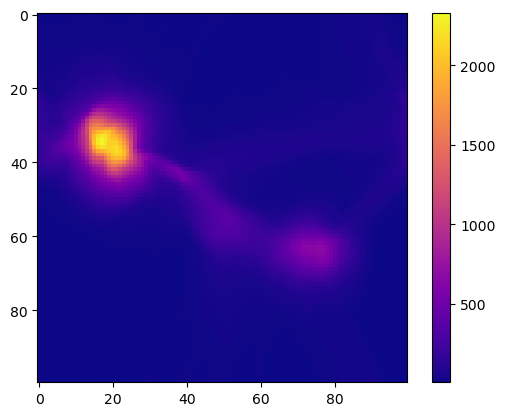

Shard shape: (5, 100, 100, 100)
Partition spec: PartitionSpec(None, 'x', 'y', 'z')
Axis mapping: {'x': 1, 'y': 2, 'z': 3}


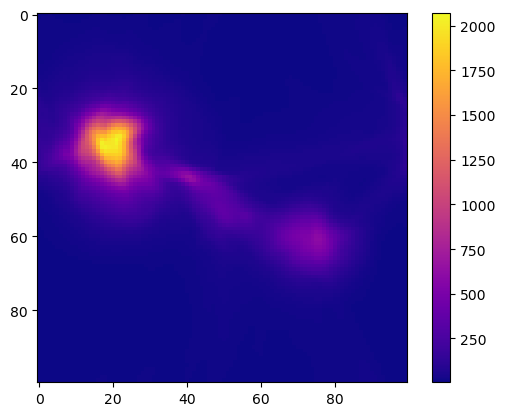

Shard shape: (5, 100, 100, 100)
Partition spec: PartitionSpec(None, 'x', 'y', 'z')
Axis mapping: {'x': 1, 'y': 2, 'z': 3}


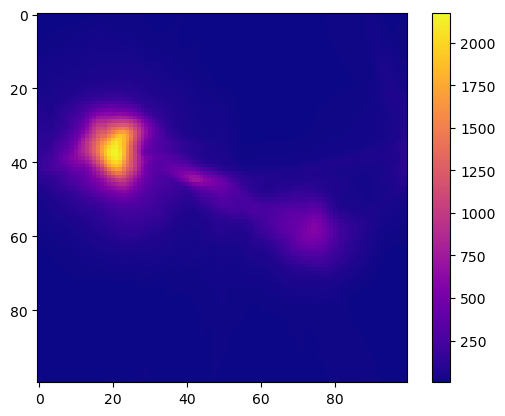

Shard shape: (5, 100, 100, 100)
Partition spec: PartitionSpec(None, 'x', 'y', 'z')
Axis mapping: {'x': 1, 'y': 2, 'z': 3}


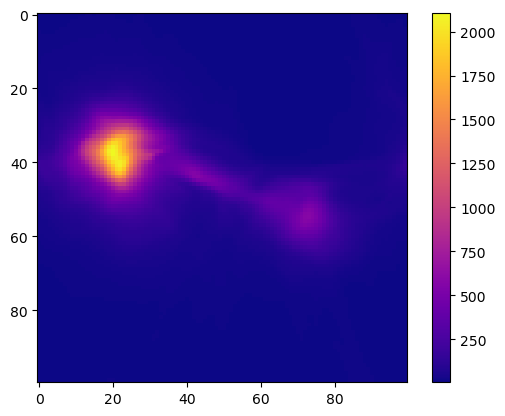

Shard shape: (5, 100, 100, 100)
Partition spec: PartitionSpec(None, 'x', 'y', 'z')
Axis mapping: {'x': 1, 'y': 2, 'z': 3}


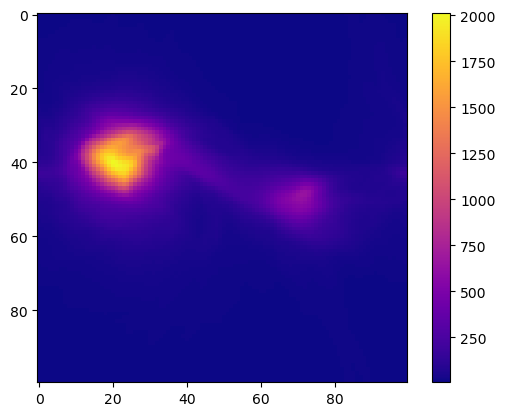

Shard shape: (5, 100, 100, 100)
Partition spec: PartitionSpec(None, 'x', 'y', 'z')
Axis mapping: {'x': 1, 'y': 2, 'z': 3}


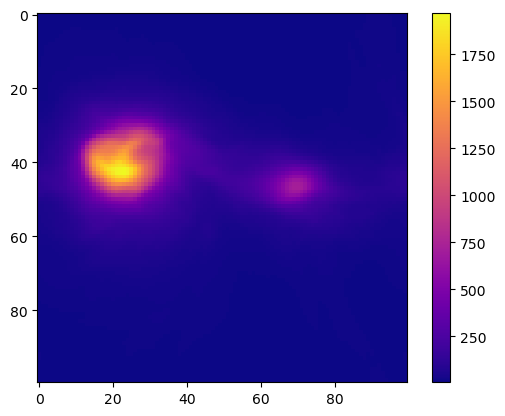

Shard shape: (5, 100, 100, 100)
Partition spec: PartitionSpec(None, 'x', 'y', 'z')
Axis mapping: {'x': 1, 'y': 2, 'z': 3}


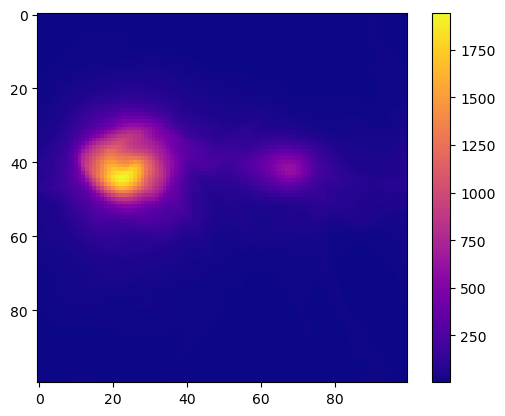

Shard shape: (5, 100, 100, 100)
Partition spec: PartitionSpec(None, 'x', 'y', 'z')
Axis mapping: {'x': 1, 'y': 2, 'z': 3}


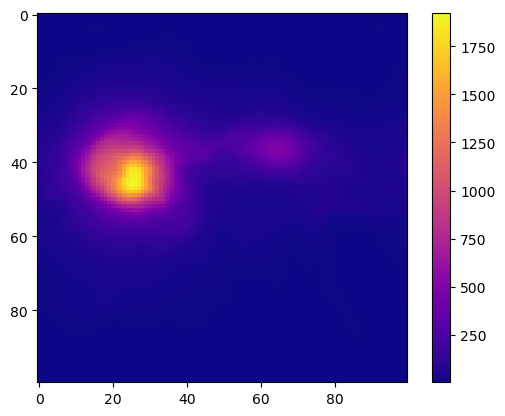

Shard shape: (5, 100, 100, 100)
Partition spec: PartitionSpec(None, 'x', 'y', 'z')
Axis mapping: {'x': 1, 'y': 2, 'z': 3}


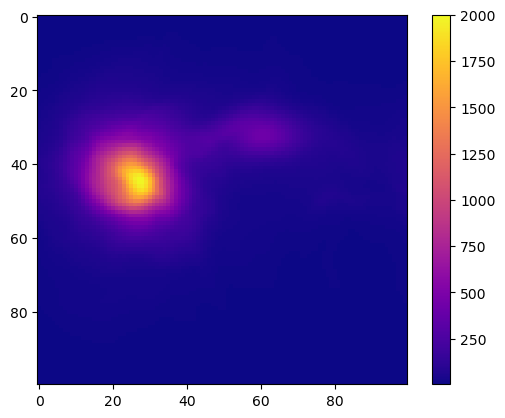

Shard shape: (5, 100, 100, 100)
Partition spec: PartitionSpec(None, 'x', 'y', 'z')
Axis mapping: {'x': 1, 'y': 2, 'z': 3}


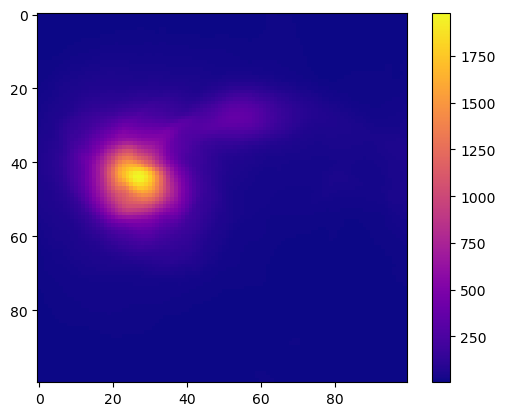

Shard shape: (5, 100, 100, 100)
Partition spec: PartitionSpec(None, 'x', 'y', 'z')
Axis mapping: {'x': 1, 'y': 2, 'z': 3}


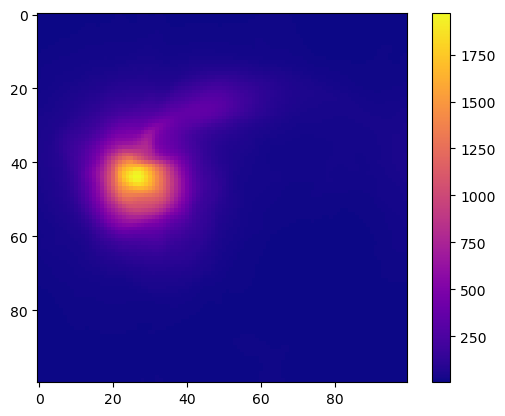

Shard shape: (5, 100, 100, 100)
Partition spec: PartitionSpec(None, 'x', 'y', 'z')
Axis mapping: {'x': 1, 'y': 2, 'z': 3}


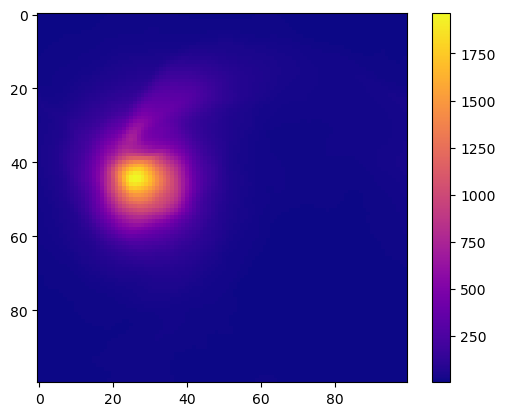

Shard shape: (5, 100, 100, 100)
Partition spec: PartitionSpec(None, 'x', 'y', 'z')
Axis mapping: {'x': 1, 'y': 2, 'z': 3}


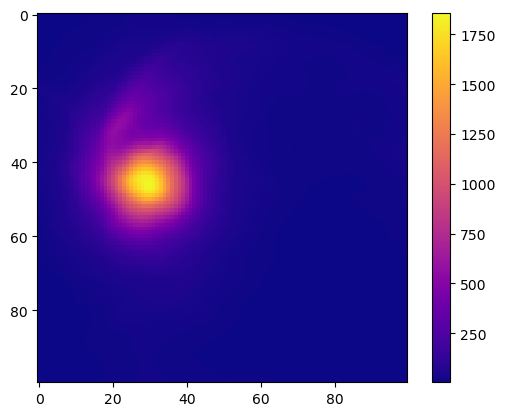

Shard shape: (5, 100, 100, 100)
Partition spec: PartitionSpec(None, 'x', 'y', 'z')
Axis mapping: {'x': 1, 'y': 2, 'z': 3}


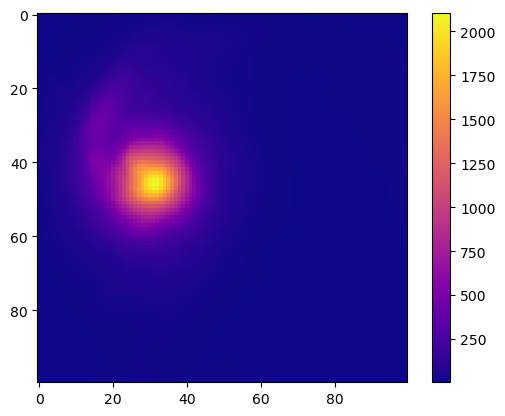

Shard shape: (5, 100, 100, 100)
Partition spec: PartitionSpec(None, 'x', 'y', 'z')
Axis mapping: {'x': 1, 'y': 2, 'z': 3}


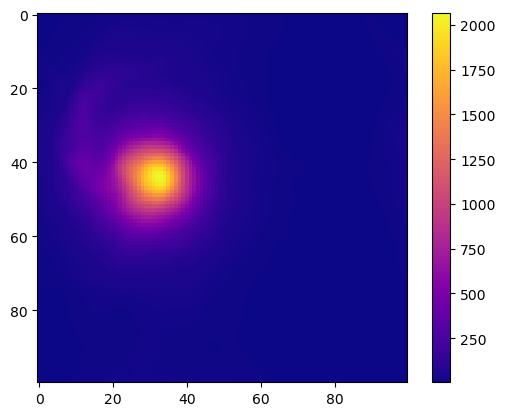

Shard shape: (5, 100, 100, 100)
Partition spec: PartitionSpec(None, 'x', 'y', 'z')
Axis mapping: {'x': 1, 'y': 2, 'z': 3}


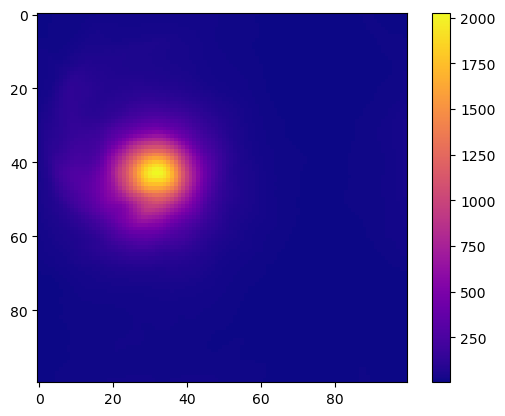

Shard shape: (5, 100, 100, 100)
Partition spec: PartitionSpec(None, 'x', 'y', 'z')
Axis mapping: {'x': 1, 'y': 2, 'z': 3}


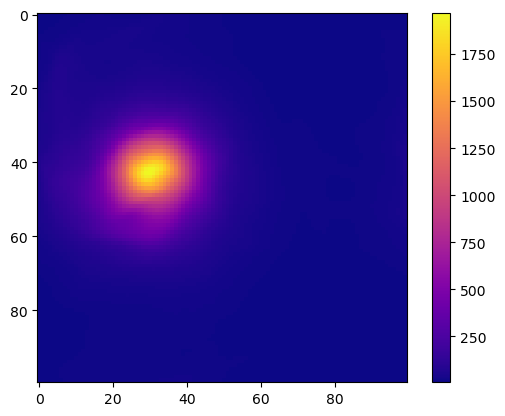

Shard shape: (5, 100, 100, 100)
Partition spec: PartitionSpec(None, 'x', 'y', 'z')
Axis mapping: {'x': 1, 'y': 2, 'z': 3}


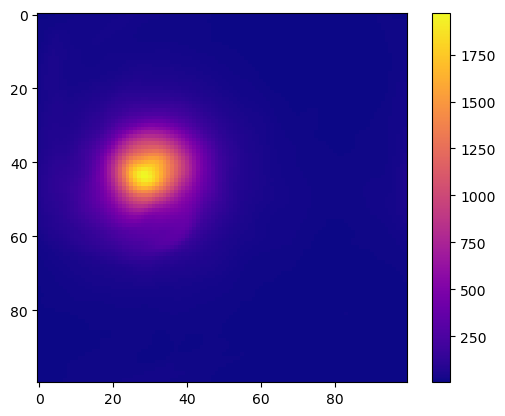

Shard shape: (5, 100, 100, 100)
Partition spec: PartitionSpec(None, 'x', 'y', 'z')
Axis mapping: {'x': 1, 'y': 2, 'z': 3}


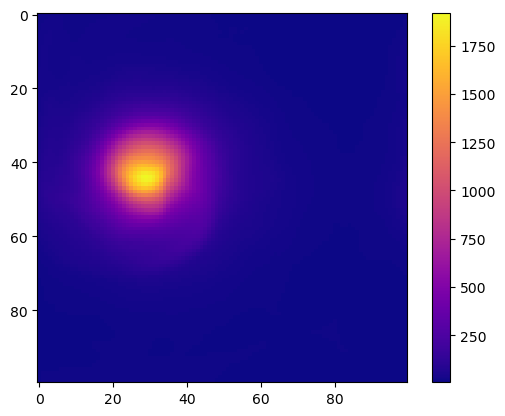

Shard shape: (5, 100, 100, 100)
Partition spec: PartitionSpec(None, 'x', 'y', 'z')
Axis mapping: {'x': 1, 'y': 2, 'z': 3}


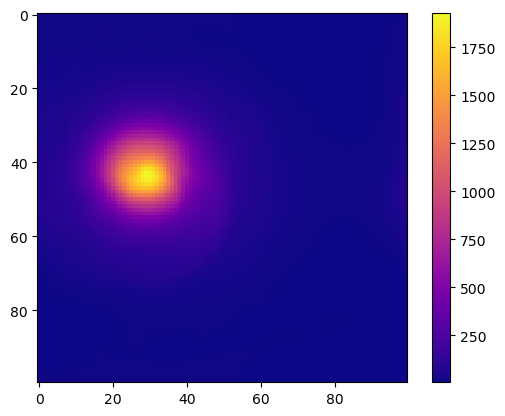

Shard shape: (5, 100, 100, 100)
Partition spec: PartitionSpec(None, 'x', 'y', 'z')
Axis mapping: {'x': 1, 'y': 2, 'z': 3}


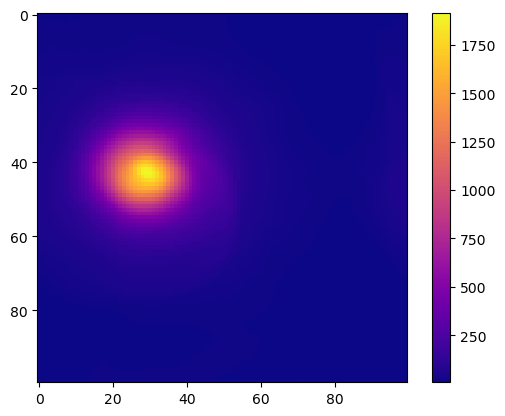

Shard shape: (5, 100, 100, 100)
Partition spec: PartitionSpec(None, 'x', 'y', 'z')
Axis mapping: {'x': 1, 'y': 2, 'z': 3}


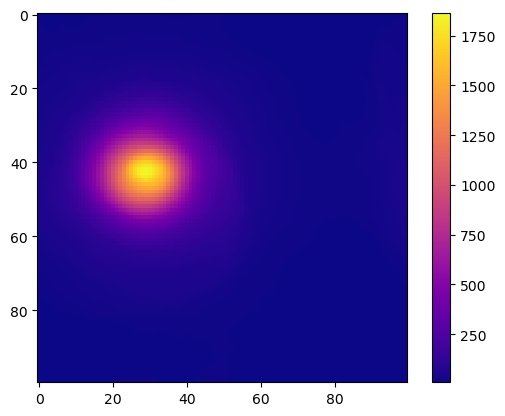

Shard shape: (5, 100, 100, 100)
Partition spec: PartitionSpec(None, 'x', 'y', 'z')
Axis mapping: {'x': 1, 'y': 2, 'z': 3}


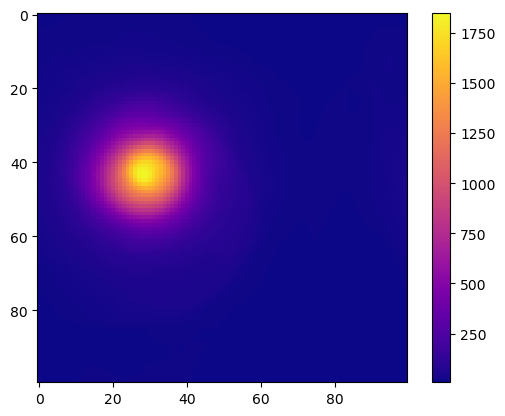

Shard shape: (5, 100, 100, 100)
Partition spec: PartitionSpec(None, 'x', 'y', 'z')
Axis mapping: {'x': 1, 'y': 2, 'z': 3}


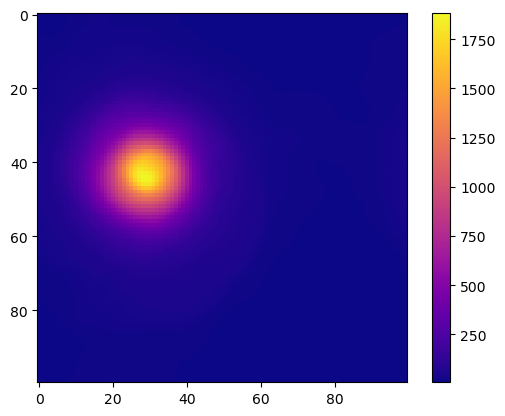

Shard shape: (5, 100, 100, 100)
Partition spec: PartitionSpec(None, 'x', 'y', 'z')
Axis mapping: {'x': 1, 'y': 2, 'z': 3}


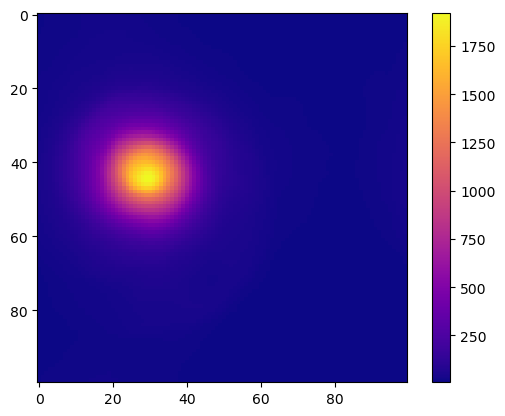

Shard shape: (5, 100, 100, 100)
Partition spec: PartitionSpec(None, 'x', 'y', 'z')
Axis mapping: {'x': 1, 'y': 2, 'z': 3}


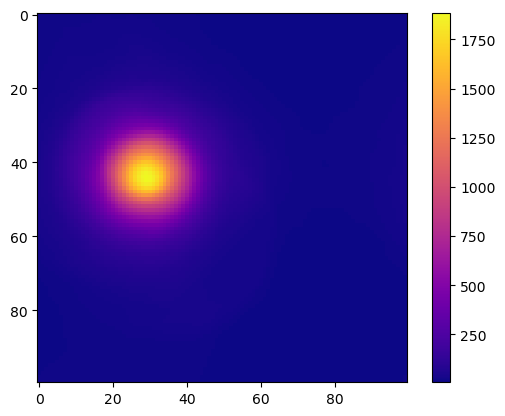

Shard shape: (5, 100, 100, 100)
Partition spec: PartitionSpec(None, 'x', 'y', 'z')
Axis mapping: {'x': 1, 'y': 2, 'z': 3}


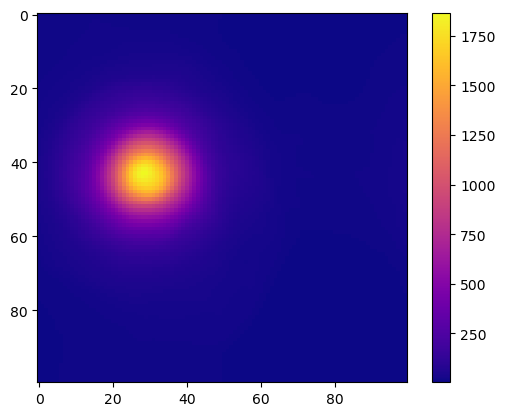

Shard shape: (5, 100, 100, 100)
Partition spec: PartitionSpec(None, 'x', 'y', 'z')
Axis mapping: {'x': 1, 'y': 2, 'z': 3}


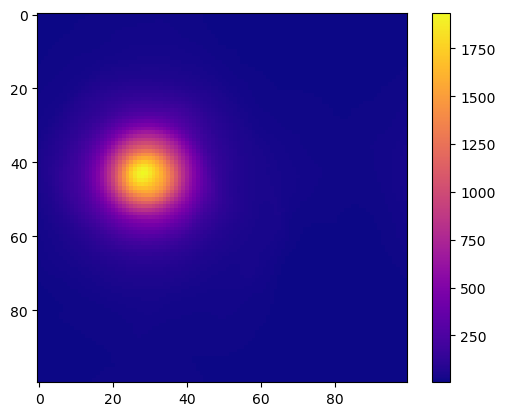

Shard shape: (5, 100, 100, 100)
Partition spec: PartitionSpec(None, 'x', 'y', 'z')
Axis mapping: {'x': 1, 'y': 2, 'z': 3}


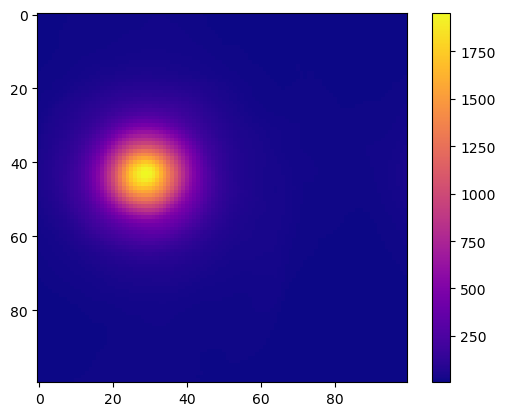

Shard shape: (5, 100, 100, 100)
Partition spec: PartitionSpec(None, 'x', 'y', 'z')
Axis mapping: {'x': 1, 'y': 2, 'z': 3}


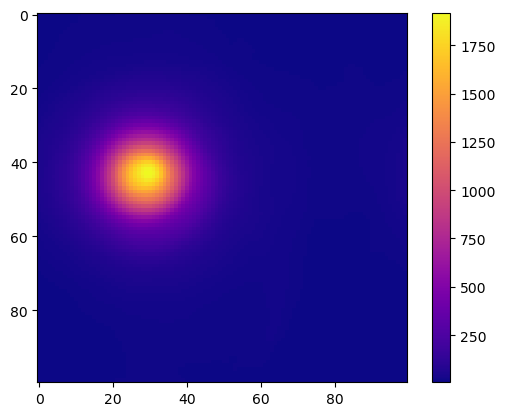

In [95]:
from diffhydro.utils.io import shard_snaps

for i in range(0,10000,250):
    imshow(shard_snaps.load_snapshot(hydro,i)[0].sum(axis=2),cmap="plasma")
    colorbar()
    show()

In [69]:
#pretty cute looking! Nice mergers/accretion, stablish blob afterward...

Shard shape: (5, 100, 100, 100)
Partition spec: PartitionSpec(None, 'x', 'y', 'z')
Axis mapping: {'x': 1, 'y': 2, 'z': 3}


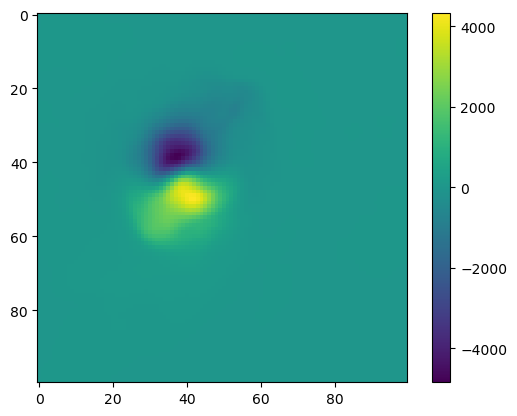

In [87]:
#velocity info
imshow(shard_snaps.load_snapshot(hydro,i)[-3].sum(axis=1))
colorbar()
show()

Shard shape: (5, 100, 100, 100)
Partition spec: PartitionSpec(None, 'x', 'y', 'z')
Axis mapping: {'x': 1, 'y': 2, 'z': 3}


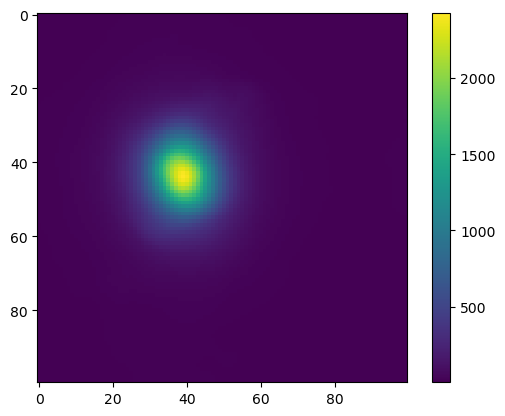

In [84]:
imshow(shard_snaps.load_snapshot(hydro,i)[0].sum(axis=1))
colorbar()
show()